In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pickle
import datetime
import glob

In [3]:
with open('./agu2018/PFISR_Conductance_20150621T0633UT_20150624T2357UT.pkl', 'r') as f:
    d = pickle.load(f)

In [11]:
# make the labels

t1970 = datetime.datetime(1970,1,1,0,0,0)
dtStart = datetime.datetime.utcfromtimestamp(d['UnixTime'][0])
dtStartDay = datetime.datetime(dtStart.year,dtStart.month,dtStart.day,0,0,0)
tUnixStartTime = (dtStartDay-t1970).total_seconds()

dtEnd = datetime.datetime.utcfromtimestamp(d['UnixTime'][-1])
dtEndDay = datetime.datetime(dtEnd.year,dtEnd.month,dtEnd.day+1,0,0,0)
tUnixEndTime = (dtEndDay-t1970).total_seconds()


In [12]:
print tUnixStartTime, tUnixEndTime

1434844800.0 1435190400.0


In [15]:
# make a uniform range that is separated by so many hours
dt = 6.*3600.

locs = numpy.arange(tUnixStartTime,tUnixEndTime+dt,dt)

In [30]:
labels = list()
for itime in locs:
    tmpdt = datetime.datetime.utcfromtimestamp(itime)
    tmplabel = '%02d/%02d\n%02d:%02d'%(tmpdt.month,tmpdt.day,tmpdt.hour,tmpdt.minute)
    print tmplabel
    labels.append(tmplabel)

06/21
00:00
06/21
06:00
06/21
12:00
06/21
18:00
06/22
00:00
06/22
06:00
06/22
12:00
06/22
18:00
06/23
00:00
06/23
06:00
06/23
12:00
06/23
18:00
06/24
00:00
06/24
06:00
06/24
12:00
06/24
18:00
06/25
00:00


In [42]:
tmpdt = datetime.datetime.utcfromtimestamp(locs[0])
tStartStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day, tmpdt.hour, tmpdt.minute)
tmpdt = datetime.datetime.utcfromtimestamp(locs[-1])
tEndStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day,tmpdt.hour, tmpdt.minute)

title = 'PFISR Conductance '+tStartStr+' - '+tEndStr
print tStartStr, tEndStr, title

2015-06-21 00:00 UT 2015-06-25 00:00 UT PFISR Conductance 2015-06-21 00:00 UT - 2015-06-25 00:00 UT


In [41]:
print labels

['06/21\n00:00', '06/21\n06:00', '06/21\n12:00', '06/21\n18:00', '06/22\n00:00', '06/22\n06:00', '06/22\n12:00', '06/22\n18:00', '06/23\n00:00', '06/23\n06:00', '06/23\n12:00', '06/23\n18:00', '06/24\n00:00', '06/24\n06:00', '06/24\n12:00', '06/24\n18:00', '06/25\n00:00']


Text(0.5,0,' Time UT')

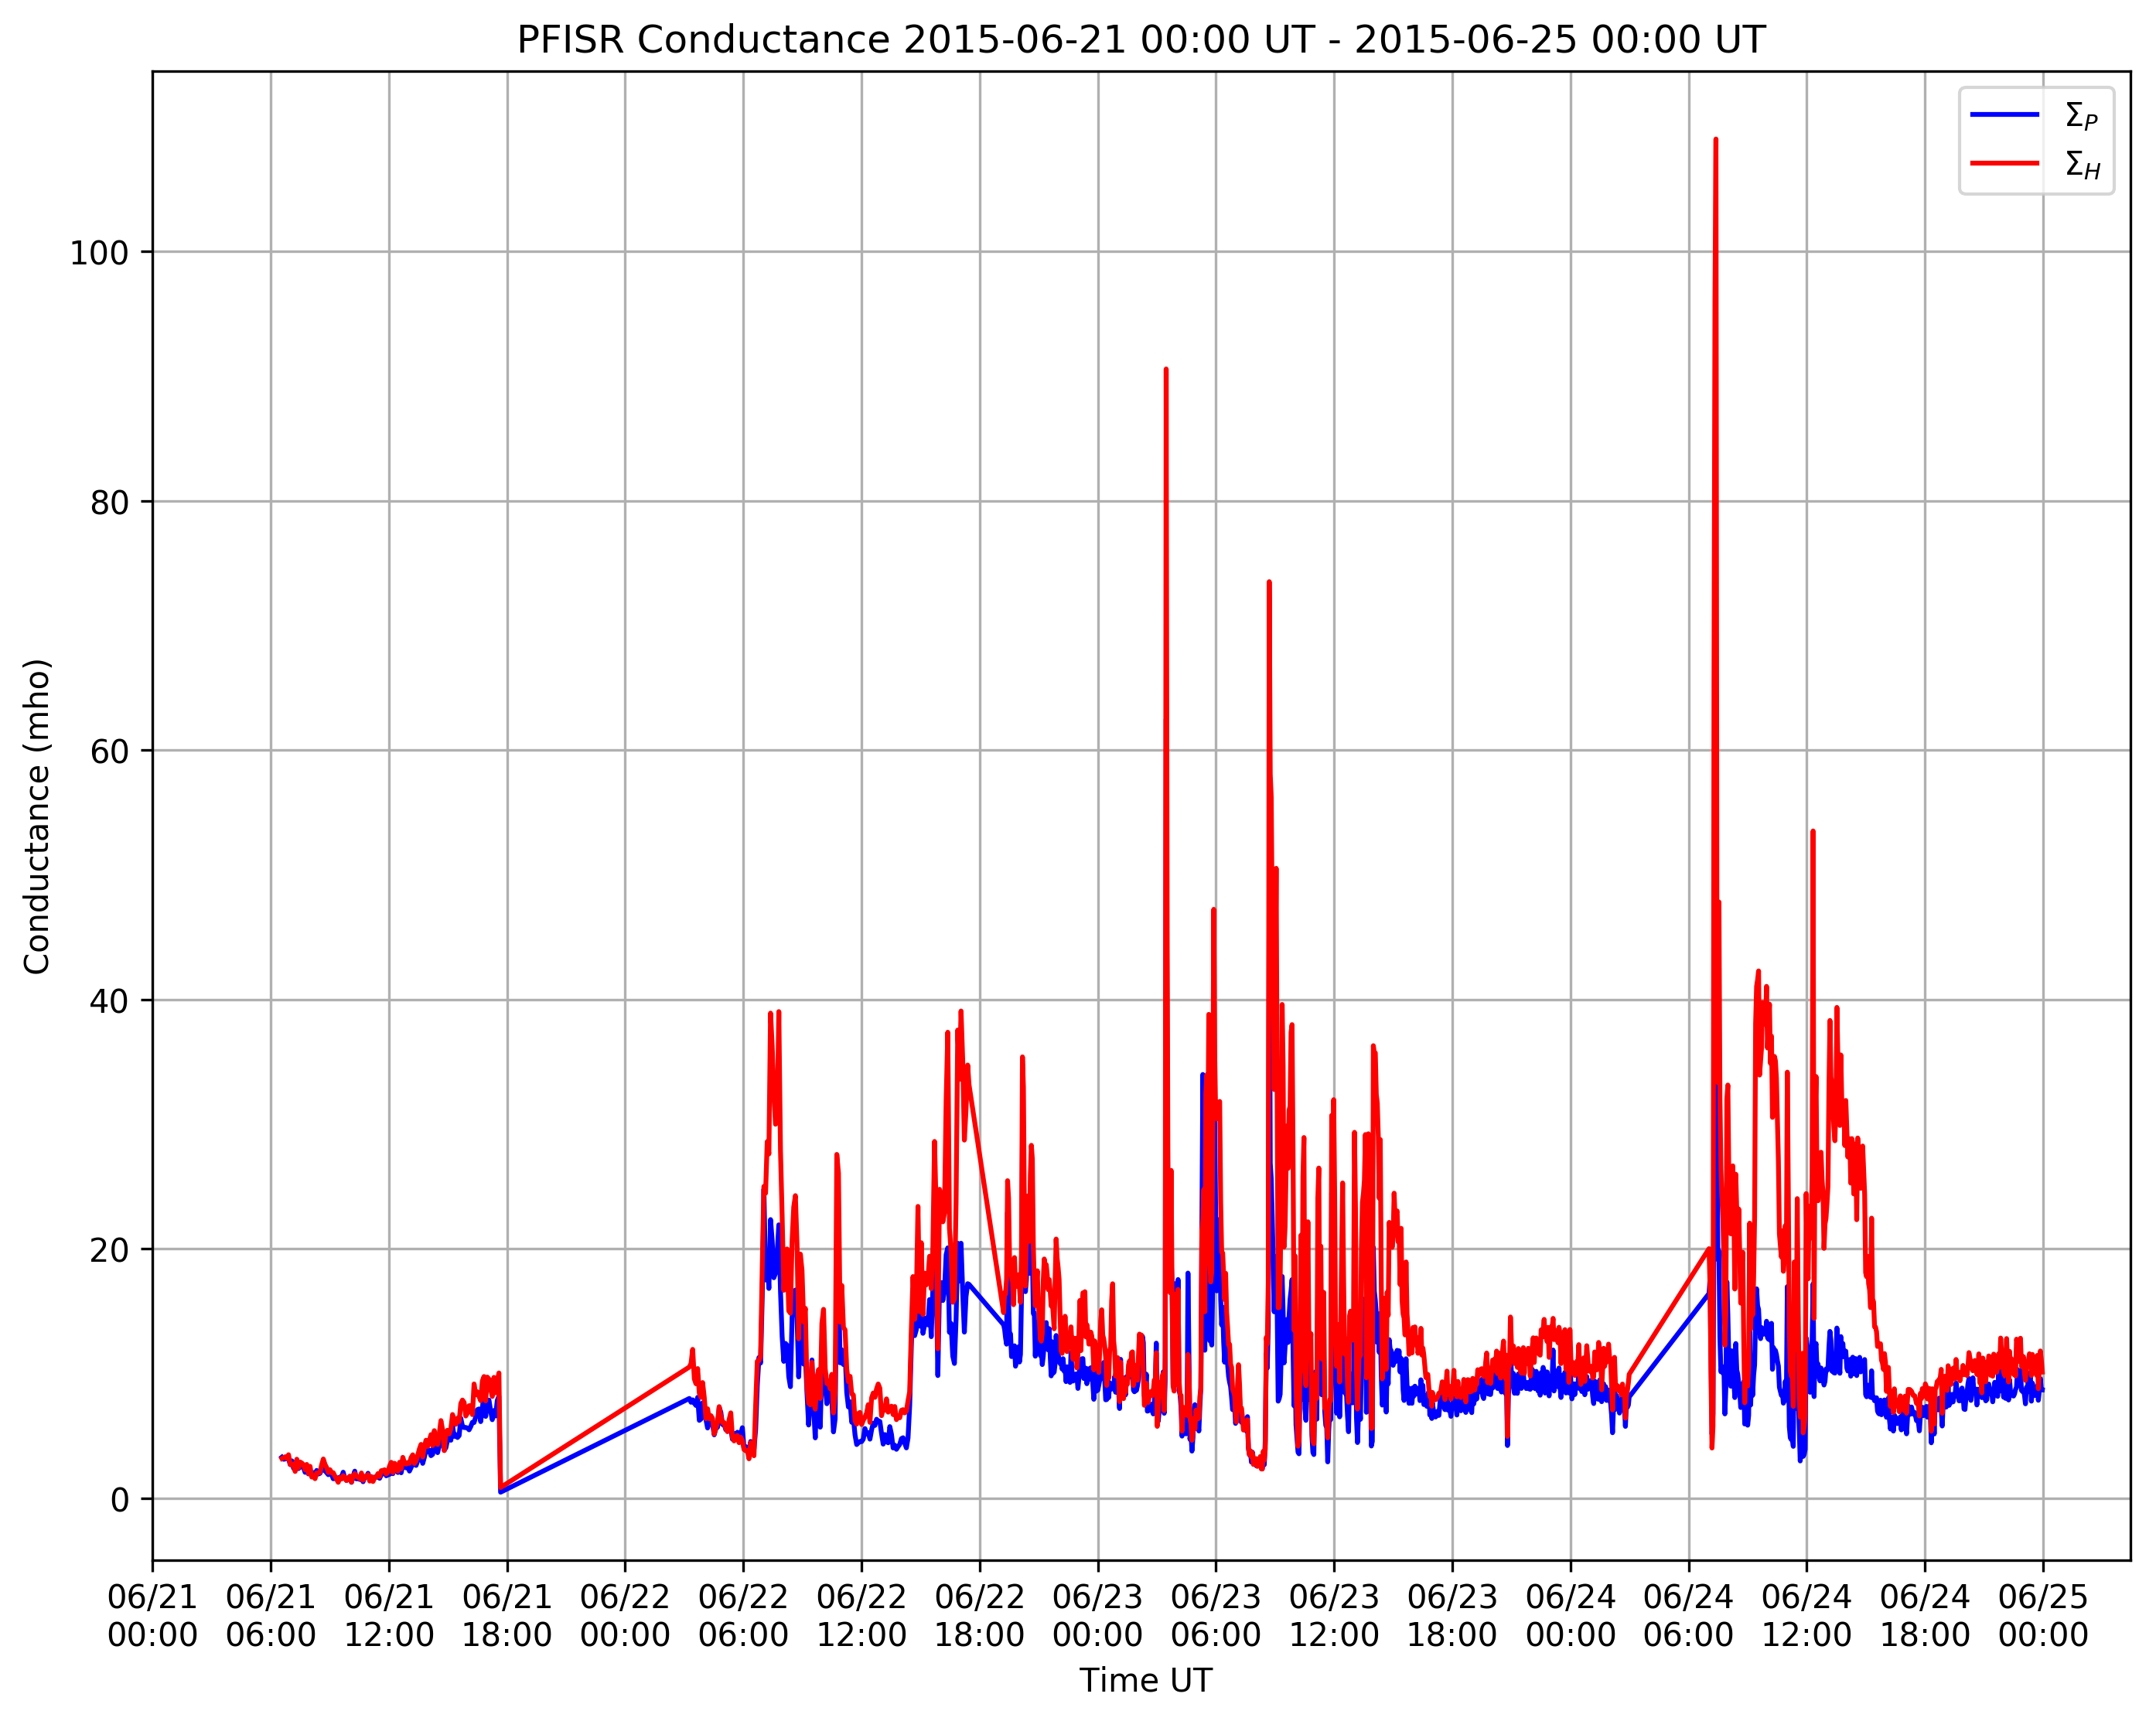

In [44]:
plt.figure(dpi=300, figsize=(11,8.5))
plt.plot(d['UnixTime'][d['PedersenConductance']>0], d['PedersenConductance'][d['PedersenConductance']>0], 'b-', label=r'$\Sigma_{P}$')
plt.plot(d['UnixTime'][d['HallConductance']>0], d['HallConductance'][d['HallConductance']>0], 'r-', label=r'$\Sigma_{H}$')
plt.xticks(locs, labels)
plt.legend()
plt.grid()
plt.title(title)
plt.ylabel('Conductance (mho)')
plt.xlabel(' Time UT')
# plt.xticklabels(labels)

In [69]:
def MakeFigure(inFile):
    with open(inFile, 'r') as f:
        d = pickle.load(f)
    
    # make the labels

    t1970 = datetime.datetime(1970,1,1,0,0,0)
    dtStart = datetime.datetime.utcfromtimestamp(d['UnixTime'][0])
    dtStartDay = datetime.datetime(dtStart.year,dtStart.month,dtStart.day,0,0,0)
    tUnixStartTime = (dtStartDay-t1970).total_seconds()

    dtEnd = datetime.datetime.utcfromtimestamp(d['UnixTime'][-1])
    dtEndDay = datetime.datetime(dtEnd.year,dtEnd.month,dtEnd.day+1,0,0,0)
    tUnixEndTime = (dtEndDay-t1970).total_seconds()
    
    # make a uniform range that is separated by so many hours
    dt = 6.*3600.
    locs = numpy.arange(tUnixStartTime,tUnixEndTime+dt,dt)
    
    labels = list()
    for itime in locs:
        tmpdt = datetime.datetime.utcfromtimestamp(itime)
        tmplabel = '%02d/%02d\n%02d:%02d'%(tmpdt.month,tmpdt.day,tmpdt.hour,tmpdt.minute)
        print tmplabel
        labels.append(tmplabel)
    
    tmpdt = datetime.datetime.utcfromtimestamp(locs[0])
    tStartStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day, tmpdt.hour, tmpdt.minute)
    tmpdt = datetime.datetime.utcfromtimestamp(locs[-1])
    tEndStr = '%04d-%02d-%02d %02d:%02d UT'%(tmpdt.year,tmpdt.month,tmpdt.day,tmpdt.hour, tmpdt.minute)

    title = 'PFISR Conductance '+tStartStr+' - '+tEndStr
    print tStartStr, tEndStr, title
    
    outFile = inFile[0:-4]+'.pdf'
    
    plt.figure(dpi=300, figsize=(10,8))
    plt.plot(d['UnixTime'][d['PedersenConductance']>0], d['PedersenConductance'][d['PedersenConductance']>0], 'b-', label=r'$\Sigma_{P}$')
    plt.plot(d['UnixTime'][d['HallConductance']>0], d['HallConductance'][d['HallConductance']>0], 'r-', label=r'$\Sigma_{H}$')
    plt.xticks(locs, labels, fontsize=12)
    plt.yticks(fontsize=14)
    plt.legend( prop={'size': 16})
    plt.grid()
    plt.title(title, fontsize=16)
    plt.ylabel('Conductance (mho)', fontsize=16)
    plt.xlabel('Time UT', fontsize=16)
    plt.tight_layout()
    plt.savefig(outFile)
    plt.close()
    
    return

In [70]:
fileList = sorted(glob.glob('./agu2018/*.pkl'))
for i in fileList:
    MakeFigure(i)

03/09
00:00
03/09
06:00
03/09
12:00
03/09
18:00
03/10
00:00
2012-03-09 00:00 UT 2012-03-10 00:00 UT PFISR Conductance 2012-03-09 00:00 UT - 2012-03-10 00:00 UT
03/17
00:00
03/17
06:00
03/17
12:00
03/17
18:00
03/18
00:00
2013-03-17 00:00 UT 2013-03-18 00:00 UT PFISR Conductance 2013-03-17 00:00 UT - 2013-03-18 00:00 UT
06/21
00:00
06/21
06:00
06/21
12:00
06/21
18:00
06/22
00:00
06/22
06:00
06/22
12:00
06/22
18:00
06/23
00:00
06/23
06:00
06/23
12:00
06/23
18:00
06/24
00:00
06/24
06:00
06/24
12:00
06/24
18:00
06/25
00:00
2015-06-21 00:00 UT 2015-06-25 00:00 UT PFISR Conductance 2015-06-21 00:00 UT - 2015-06-25 00:00 UT
10/13
00:00
10/13
06:00
10/13
12:00
10/13
18:00
10/14
00:00
10/14
06:00
10/14
12:00
10/14
18:00
10/15
00:00
10/15
06:00
10/15
12:00
10/15
18:00
10/16
00:00
2016-10-13 00:00 UT 2016-10-16 00:00 UT PFISR Conductance 2016-10-13 00:00 UT - 2016-10-16 00:00 UT
